In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline


### Loading the MNIST Dataset

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape the input data to have a single channel
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# Convert the labels to one-hot encoded vectors
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

C:\Users\ashek\AppData\Roaming\Python\Python310\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


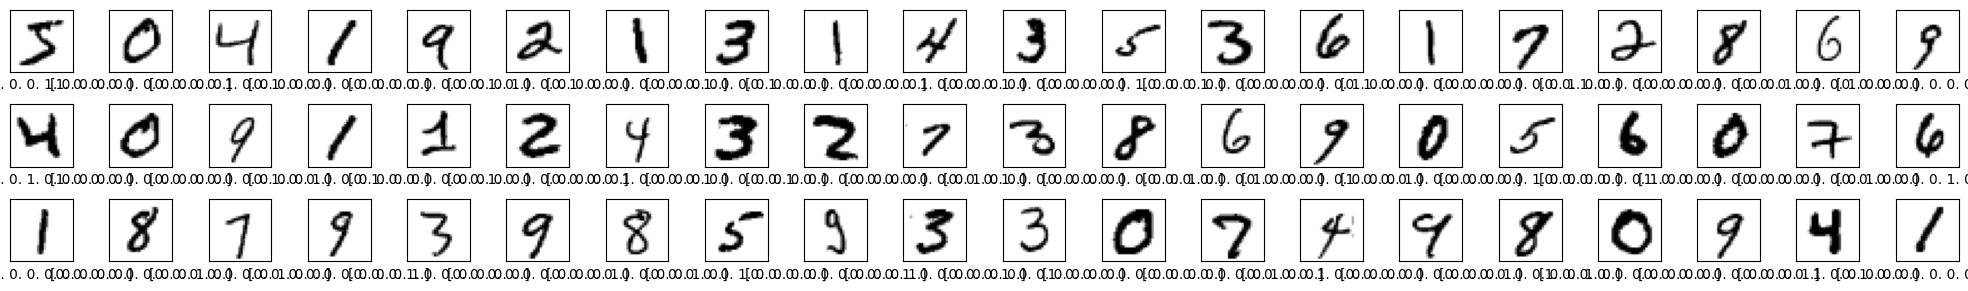

In [3]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show() 

### Building Model

In [4]:
def build_model():
    model = keras.Sequential(
        [
            keras.Input(shape=28*28),
            layers.Dense(units=256, activation='relu'),
            layers.Dense(units=128, activation='relu'),
            layers.Dense(units=10, activation='softmax')
        ])
    return model

model = build_model()


### Compiling the model with different optimizers

In [5]:
# Compile the model with SGD optimizer
model_sgd = build_model()
model_sgd.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"],
)

# Compile the model with Adam optimizer
model_adam = build_model()
model_adam.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

# Compile the model with RMSprop optimizer
model_rmsprop = build_model()
model_rmsprop.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=["accuracy"],
)


### Training the models

In [7]:
# Train the models and record their accuracy and loss
history_sgd = model_sgd.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)
history_adam = model_adam.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)
history_rmsprop = model_rmsprop.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Print the test set accuracy for each optimizer
print('Test set accuracy for SGD optimizer:', test_acc_sgd)
print('Test set accuracy for Adam optimizer:', test_acc_adam)
print('Test set accuracy for RMSprop optimizer:', test_acc_rmsprop)


Epoch 1/5
750/750 [==============================] - 23s 31ms/step - loss: 0.2092 - accuracy: 0.9371 - val_loss: 0.1663 - val_accuracy: 0.9517
Epoch 2/5
750/750 [==============================] - 20s 27ms/step - loss: 0.1523 - accuracy: 0.9536 - val_loss: 0.1314 - val_accuracy: 0.9619
Epoch 3/5
750/750 [==============================] - 17s 23ms/step - loss: 0.1229 - accuracy: 0.9621 - val_loss: 0.1082 - val_accuracy: 0.9689
Epoch 4/5
750/750 [==============================] - 18s 24ms/step - loss: 0.1044 - accuracy: 0.9682 - val_loss: 0.1008 - val_accuracy: 0.9700
Epoch 5/5
750/750 [==============================] - 18s 24ms/step - loss: 0.0907 - accuracy: 0.9719 - val_loss: 0.0879 - val_accuracy: 0.9741
Epoch 1/5
750/750 [==============================] - 19s 25ms/step - loss: 0.1834 - accuracy: 0.9435 - val_loss: 0.0738 - val_accuracy: 0.9783
Epoch 2/5
750/750 [==============================] - 19s 25ms/step - loss: 0.0525 - accuracy: 0.9839 - val_loss: 0.0461 - val_accuracy: 0.9867

### Plotting the Comparison

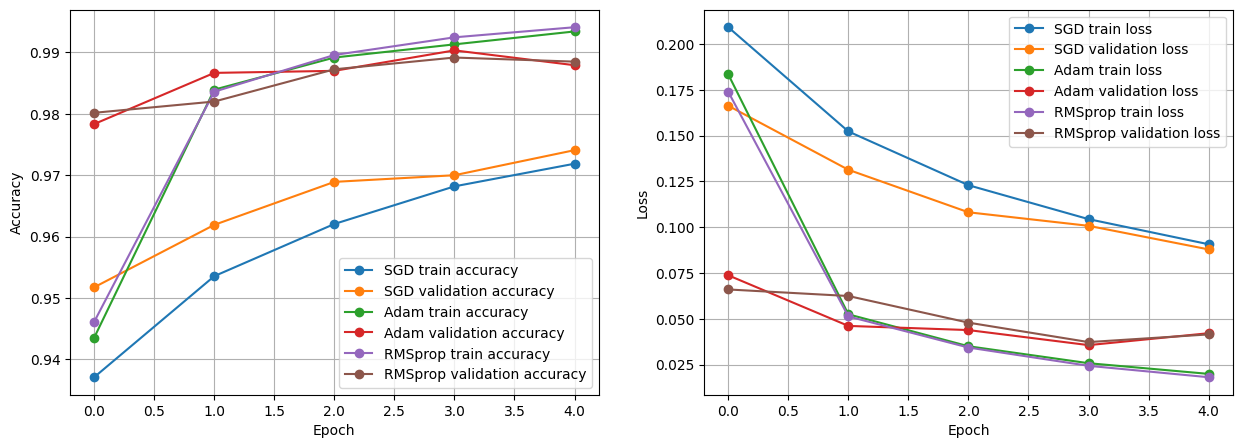

In [8]:
# Plot the comparison of the three optimizers' performance
plt.figure(figsize=(15,5))

# Plot the accuracy
plt.subplot(1,2,1)
plt.plot(history_sgd.history['accuracy'], 'o-', label='SGD train accuracy')
plt.plot(history_sgd.history['val_accuracy'], 'o-', label = 'SGD validation accuracy')
plt.plot(history_adam.history['accuracy'], 'o-', label='Adam train accuracy')
plt.plot(history_adam.history['val_accuracy'], 'o-', label = 'Adam validation accuracy')
plt.plot(history_rmsprop.history['accuracy'], 'o-', label='RMSprop train accuracy')
plt.plot(history_rmsprop.history['val_accuracy'], 'o-', label = 'RMSprop validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

# Plot the loss
plt.subplot(1,2,2)
plt.plot(history_sgd.history['loss'], 'o-', label='SGD train loss')
plt.plot(history_sgd.history['val_loss'], 'o-', label='SGD validation loss')
plt.plot(history_adam.history['loss'], 'o-', label='Adam train loss')
plt.plot(history_adam.history['val_loss'], 'o-', label='Adam validation loss')
plt.plot(history_rmsprop.history['loss'], 'o-', label='RMSprop train loss')
plt.plot(history_rmsprop.history['val_loss'], 'o-', label='RMSprop validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()


Accuracy for Adam Optimizer was better with 99% Accuracy